#### Problem Statement:To predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

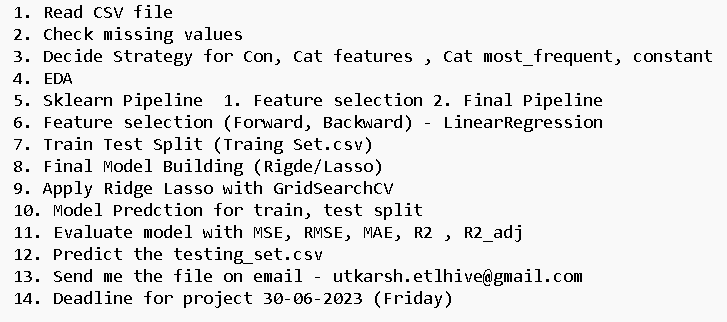

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv(r'F:\DS\Datasets\House Pricing Project\training_set.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
s=df.isna().sum()
s

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
s[s>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [8]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
df.duplicated().sum()

0

### Data Visualisation

#### Visualizing a corelation between Numeric variables

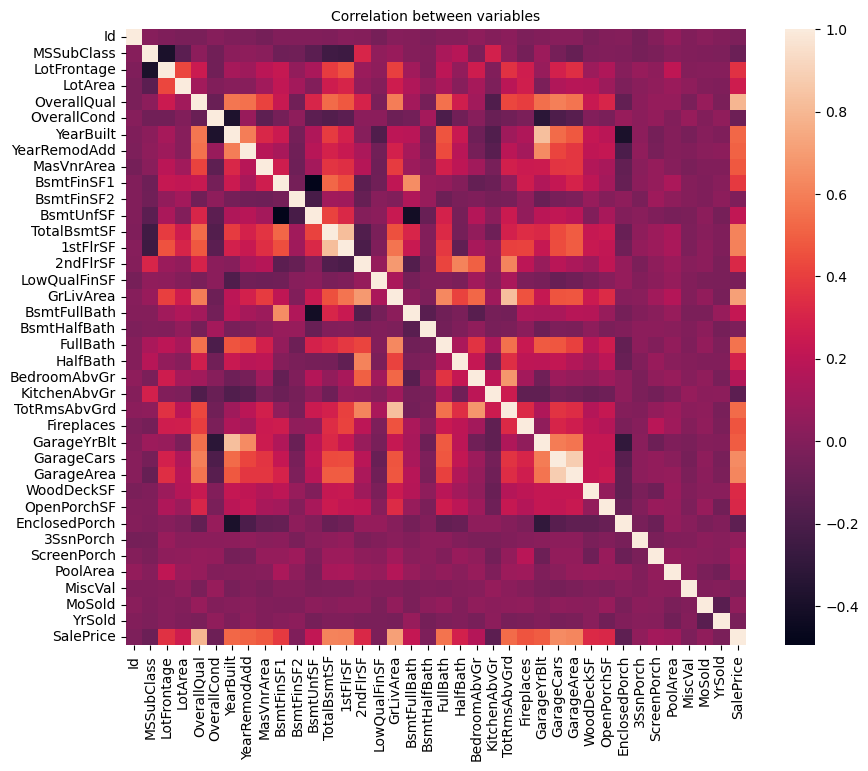

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())
plt.title('Correlation between variables', size= 10)
plt.show()

###  zoning classification of the sale.


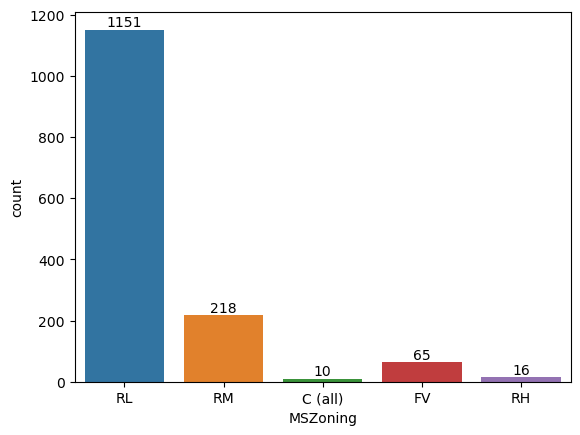

In [11]:
# To know zoning classification.
ax=sns.countplot(x='MSZoning',data= df)
for bars in ax.containers:
    ax.bar_label(bars)
#or
# sns.countplot(df['MSZoning'])

According to the graph zoning huses from 'residential low density 'zone has sold out in large number. people are preffered to live in residential low density zone.

In [12]:
zone_sale=df.groupby(['MSZoning'],as_index=False)['SalePrice'].mean()
zone_sale

,MSZoning,SalePrice
0,C (all),74528.000000
1,FV,214014.061538
2,RH,131558.375000
3,RL,191004.994787
4,RM,126316.830275


### Zone wise sale price

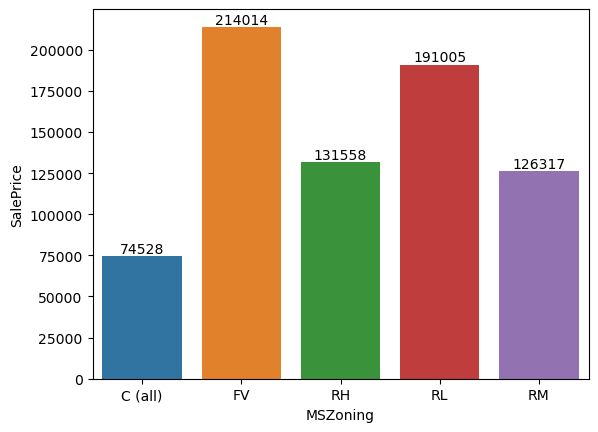

In [13]:
ax1= sns.barplot(x='MSZoning',y='SalePrice',data= zone_sale)
for bars in ax1.containers:
    ax1.bar_label(bars)

From above graph it is concluded that average cost of houses in Floating village residential zone is high.

### Utility wise SalePrice of houses.

In [14]:
Utility_saleprice= df.groupby(['Utilities'],as_index= False)['SalePrice'].sum()
Utility_saleprice

,Utilities,SalePrice
0,AllPub,264007446
1,NoSeWa,137500


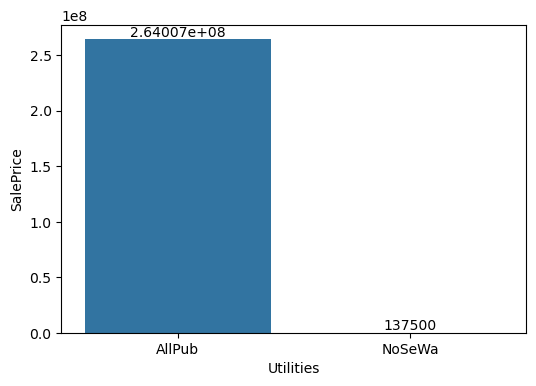

In [15]:
plt.figure(figsize=(6,4))
ax2= sns.barplot(x='Utilities',y='SalePrice',data= Utility_saleprice)
for bars in ax2.containers:
    ax2.bar_label(bars)

### Seperate dependent and Independent variable

Saleprice ~ Remaining features

In [16]:
x = df.drop(columns=['Id','SalePrice'],axis=1)
y= df[['SalePrice']]

In [17]:
x

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [18]:
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


### Seperate Categorical and Contineous features

In [19]:
cat= x.columns[x.dtypes=='object']
con= x.columns[x.dtypes!='object']

In [20]:
cat

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [21]:
con

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

### Data preprocessing by using pipeline

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [23]:
# Numeric Pipeline
num_pipe1= Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                    ('scaler',StandardScaler())])

# Categotical Pipeline
cat_pipe1= Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                    ('enc',OrdinalEncoder())])

# To combine both the ppelines

pre1= ColumnTransformer([('num',num_pipe1,con),
                       ('cat',cat_pipe1,cat)])

In [24]:
x_pre1= pre1.fit_transform(x)

In [25]:
x_pre1

array([[ 0.07337496, -0.22937175, -0.20714171, ...,  2.        ,
         8.        ,  4.        ],
       [-0.87256276,  0.4519361 , -0.09188637, ...,  2.        ,
         8.        ,  4.        ],
       [ 0.07337496, -0.09311018,  0.07347998, ...,  2.        ,
         8.        ,  4.        ],
       ...,
       [ 0.30985939, -0.18395123, -0.14781027, ...,  2.        ,
         8.        ,  4.        ],
       [-0.87256276, -0.09311018, -0.08016039, ...,  2.        ,
         8.        ,  4.        ],
       [-0.87256276,  0.22483348, -0.05811155, ...,  2.        ,
         8.        ,  4.        ]])

In [26]:
cols= pre1.get_feature_names_out()

In [27]:
cols

array(['num__MSSubClass', 'num__LotFrontage', 'num__LotArea',
       'num__OverallQual', 'num__OverallCond', 'num__YearBuilt',
       'num__YearRemodAdd', 'num__MasVnrArea', 'num__BsmtFinSF1',
       'num__BsmtFinSF2', 'num__BsmtUnfSF', 'num__TotalBsmtSF',
       'num__1stFlrSF', 'num__2ndFlrSF', 'num__LowQualFinSF',
       'num__GrLivArea', 'num__BsmtFullBath', 'num__BsmtHalfBath',
       'num__FullBath', 'num__HalfBath', 'num__BedroomAbvGr',
       'num__KitchenAbvGr', 'num__TotRmsAbvGrd', 'num__Fireplaces',
       'num__GarageYrBlt', 'num__GarageCars', 'num__GarageArea',
       'num__WoodDeckSF', 'num__OpenPorchSF', 'num__EnclosedPorch',
       'num__3SsnPorch', 'num__ScreenPorch', 'num__PoolArea',
       'num__MiscVal', 'num__MoSold', 'num__YrSold', 'cat__MSZoning',
       'cat__Street', 'cat__Alley', 'cat__LotShape', 'cat__LandContour',
       'cat__Utilities', 'cat__LotConfig', 'cat__LandSlope',
       'cat__Neighborhood', 'cat__Condition1', 'cat__Condition2',
       'cat__BldgTy

In [28]:
xpre_= pd.DataFrame(x_pre1,columns=cols)
xpre_


,num__MSSubClass,num__LotFrontage,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,...,cat__GarageType,cat__GarageFinish,cat__GarageQual,cat__GarageCond,cat__PavedDrive,cat__PoolQC,cat__Fence,cat__MiscFeature,cat__SaleType,cat__SaleCondition
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,...,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,...,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,...,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,...,5.0,2.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,0.0
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,...,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.365633,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.574410,-0.973018,-0.288653,...,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
1456,-0.872563,0.679039,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084843,0.759659,0.722112,...,1.0,2.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
1457,0.309859,-0.183951,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.574410,-0.369871,-0.288653,...,1.0,1.0,4.0,4.0,2.0,2.0,0.0,2.0,8.0,4.0
1458,-0.872563,-0.093110,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.574410,-0.865548,6.092188,...,1.0,2.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0


### Feature selection by using Backward elimination

In [29]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression


In [30]:
lr = LinearRegression()
sel= SequentialFeatureSelector(lr, direction='backward',n_jobs=-1)


In [31]:
sel_features = sel.fit_transform(xpre_,y)
sel_features

array([[-0.20714171,  0.65147924, -0.51719981, ...,  2.        ,
         2.        ,  4.        ],
       [-0.09188637, -0.07183611,  2.17962776, ...,  2.        ,
         2.        ,  4.        ],
       [ 0.07347998,  0.65147924, -0.51719981, ...,  2.        ,
         2.        ,  4.        ],
       ...,
       [-0.14781027,  0.65147924,  3.07857028, ...,  2.        ,
         0.        ,  4.        ],
       [-0.08016039, -0.79515147,  0.38174271, ...,  2.        ,
         2.        ,  4.        ],
       [-0.05811155, -0.79515147,  0.38174271, ...,  2.        ,
         2.        ,  4.        ]])

In [32]:
cols2 = sel.get_feature_names_out()
cols2

array(['num__LotArea', 'num__OverallQual', 'num__OverallCond',
       'num__YearBuilt', 'num__YearRemodAdd', 'num__MasVnrArea',
       'num__BsmtUnfSF', 'num__1stFlrSF', 'num__2ndFlrSF',
       'num__BsmtFullBath', 'num__BsmtHalfBath', 'num__KitchenAbvGr',
       'num__TotRmsAbvGrd', 'num__Fireplaces', 'num__GarageCars',
       'num__WoodDeckSF', 'num__ScreenPorch', 'num__PoolArea',
       'num__YrSold', 'cat__MSZoning', 'cat__Street', 'cat__Neighborhood',
       'cat__BldgType', 'cat__HouseStyle', 'cat__RoofMatl',
       'cat__Exterior1st', 'cat__ExterQual', 'cat__BsmtQual',
       'cat__BsmtCond', 'cat__BsmtExposure', 'cat__BsmtFinType1',
       'cat__BsmtFinType2', 'cat__HeatingQC', 'cat__KitchenQual',
       'cat__Functional', 'cat__FireplaceQu', 'cat__GarageCond',
       'cat__PavedDrive', 'cat__Fence', 'cat__SaleCondition'],
      dtype=object)

In [33]:
imp_cols= []
for i in cols2:
    s= i.split('__')[1]
    imp_cols.append(s)

In [34]:
imp_cols

['LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtUnfSF',
 '1stFlrSF',
 '2ndFlrSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'ScreenPorch',
 'PoolArea',
 'YrSold',
 'MSZoning',
 'Street',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofMatl',
 'Exterior1st',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'SaleCondition']

In [35]:
x_sel= x[imp_cols]
x_sel

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,1stFlrSF,2ndFlrSF,BsmtFullBath,...,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageCond,PavedDrive,Fence,SaleCondition
0,8450,7,5,2003,2003,196.0,150,856,854,1,...,GLQ,Unf,Ex,Gd,Typ,NaN,TA,Y,NaN,Normal
1,9600,6,8,1976,1976,0.0,284,1262,0,0,...,ALQ,Unf,Ex,TA,Typ,TA,TA,Y,NaN,Normal
2,11250,7,5,2001,2002,162.0,434,920,866,1,...,GLQ,Unf,Ex,Gd,Typ,TA,TA,Y,NaN,Normal
3,9550,7,5,1915,1970,0.0,540,961,756,1,...,ALQ,Unf,Gd,Gd,Typ,Gd,TA,Y,NaN,Abnorml
4,14260,8,5,2000,2000,350.0,490,1145,1053,1,...,GLQ,Unf,Ex,Gd,Typ,TA,TA,Y,NaN,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,1999,2000,0.0,953,953,694,0,...,Unf,Unf,Ex,TA,Typ,TA,TA,Y,NaN,Normal
1456,13175,6,6,1978,1988,119.0,589,2073,0,1,...,ALQ,Rec,TA,TA,Min1,TA,TA,Y,MnPrv,Normal
1457,9042,7,9,1941,2006,0.0,877,1188,1152,0,...,GLQ,Unf,Ex,Gd,Typ,Gd,TA,Y,GdPrv,Normal
1458,9717,5,6,1950,1996,0.0,0,1078,0,1,...,GLQ,Rec,Gd,Gd,Typ,NaN,TA,Y,NaN,Normal


### Seperate categorical and contineous features from selected features

In [36]:
cat2= x_sel.columns[x_sel.dtypes=='object']
con2= x_sel.columns[x_sel.dtypes!='object']

In [37]:
cat2

Index(['MSZoning', 'Street', 'Neighborhood', 'BldgType', 'HouseStyle',
       'RoofMatl', 'Exterior1st', 'ExterQual', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageCond', 'PavedDrive',
       'Fence', 'SaleCondition'],
      dtype='object')

In [38]:
con2

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'PoolArea', 'YrSold'],
      dtype='object')

### Create Pipeline for selected featurex

In [39]:
# Numeric Pipe 2
num_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                            ('scaler',StandardScaler())])

# Categorical Pipe 2
cat_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                            ('one_hot_enc',OneHotEncoder(handle_unknown='ignore'))])

# ColumnTransformer
pre2 = ColumnTransformer([('num',num_pipe2,con2),
                          ('cat',cat_pipe2,cat2)])

In [40]:
x_sel_pre = pre2.fit_transform(x_sel).toarray()
x_sel_pre

array([[-0.20714171,  0.65147924, -0.51719981, ...,  0.        ,
         1.        ,  0.        ],
       [-0.09188637, -0.07183611,  2.17962776, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.07347998,  0.65147924, -0.51719981, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.14781027,  0.65147924,  3.07857028, ...,  0.        ,
         1.        ,  0.        ],
       [-0.08016039, -0.79515147,  0.38174271, ...,  0.        ,
         1.        ,  0.        ],
       [-0.05811155, -0.79515147,  0.38174271, ...,  0.        ,
         1.        ,  0.        ]])

In [41]:
final_cols= pre2.get_feature_names_out()
final_cols

array(['num__LotArea', 'num__OverallQual', 'num__OverallCond',
       'num__YearBuilt', 'num__YearRemodAdd', 'num__MasVnrArea',
       'num__BsmtUnfSF', 'num__1stFlrSF', 'num__2ndFlrSF',
       'num__BsmtFullBath', 'num__BsmtHalfBath', 'num__KitchenAbvGr',
       'num__TotRmsAbvGrd', 'num__Fireplaces', 'num__GarageCars',
       'num__WoodDeckSF', 'num__ScreenPorch', 'num__PoolArea',
       'num__YrSold', 'cat__MSZoning_C (all)', 'cat__MSZoning_FV',
       'cat__MSZoning_RH', 'cat__MSZoning_RL', 'cat__MSZoning_RM',
       'cat__Street_Grvl', 'cat__Street_Pave',
       'cat__Neighborhood_Blmngtn', 'cat__Neighborhood_Blueste',
       'cat__Neighborhood_BrDale', 'cat__Neighborhood_BrkSide',
       'cat__Neighborhood_ClearCr', 'cat__Neighborhood_CollgCr',
       'cat__Neighborhood_Crawfor', 'cat__Neighborhood_Edwards',
       'cat__Neighborhood_Gilbert', 'cat__Neighborhood_IDOTRR',
       'cat__Neighborhood_MeadowV', 'cat__Neighborhood_Mitchel',
       'cat__Neighborhood_NAmes', 'cat__Neigh

In [42]:
x_pre2 = pd.DataFrame(x_sel_pre, columns=final_cols)
x_pre2

,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtUnfSF,num__1stFlrSF,num__2ndFlrSF,num__BsmtFullBath,...,cat__Fence_GdPrv,cat__Fence_GdWo,cat__Fence_MnPrv,cat__Fence_MnWw,cat__SaleCondition_Abnorml,cat__SaleCondition_AdjLand,cat__SaleCondition_Alloca,cat__SaleCondition_Family,cat__SaleCondition_Normal,cat__SaleCondition_Partial
0,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,-0.944591,-0.793434,1.161852,1.107810,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,-0.641228,0.257140,-0.795163,-0.819964,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,-0.301643,-0.627826,1.189351,1.107810,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.061670,-0.521734,0.937276,1.107810,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,-0.174865,-0.045611,1.617877,1.107810,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.574410,0.873321,-0.542435,0.795198,-0.819964,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084843,0.049262,2.355701,-0.795163,1.107810,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.574410,0.701265,0.065656,1.844744,-0.819964,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.574410,-1.284176,-0.218982,-0.795163,1.107810,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Train Test Split

In [43]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_pre2, y ,train_size=0.8, random_state= 56)

In [44]:
print('xtrain.shape:',xtrain.shape)
print('ytrain.shape:',ytrain.shape)
print('xtest.shape:',xtest.shape)
print('ytest.shape:',ytest.shape)

xtrain.shape: (1168, 154)
ytrain.shape: (1168, 1)
xtest.shape: (292, 154)
ytest.shape: (292, 1)


### Build Base model: Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()


In [46]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [47]:
# R2 score in training
lr.score(xtrain,ytrain)

0.9263309146914576

In [48]:
lr.score(xtest,ytest)

-4.655767825220765e+18

In [49]:
ypred_tr= lr.predict(xtrain)
ypred_ts= lr.predict(xtest)

In [50]:
ypred_tr

array([[283277.5],
       [173628. ],
       [322260.5],
       ...,
       [141541. ],
       [217329.5],
       [127641.5]])

In [51]:
ypred_ts

array([[ 5.96000500e+05],
       [ 1.78819500e+05],
       [ 1.29403500e+05],
       [ 1.63022500e+05],
       [ 9.47740000e+04],
       [ 7.66975000e+04],
       [ 6.57890000e+04],
       [ 1.25682000e+05],
       [ 1.77684000e+05],
       [ 3.63199000e+05],
       [ 3.09509500e+05],
       [ 4.82185000e+04],
       [ 4.18643500e+05],
       [ 2.76172500e+05],
       [ 1.37713000e+05],
       [ 1.66054000e+05],
       [ 1.48417000e+05],
       [ 1.38318000e+05],
       [ 1.33784000e+05],
       [ 1.44741500e+05],
       [ 1.52649000e+05],
       [ 2.56042500e+05],
       [ 2.24159500e+05],
       [ 4.36137049e+14],
       [ 1.37808000e+05],
       [ 2.69316500e+05],
       [ 1.81241000e+05],
       [ 1.70079000e+05],
       [ 1.63034500e+05],
       [ 2.13841000e+05],
       [ 2.22366500e+05],
       [ 1.98594500e+05],
       [ 2.12453500e+05],
       [ 4.41381500e+05],
       [ 1.27581000e+05],
       [ 1.37104500e+05],
       [ 1.90432500e+05],
       [ 1.23958500e+05],
       [ 1.6

In [52]:
#To evelute base model
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
tr_mse= mean_squared_error(ytrain,ypred_tr)
tr_rmse= tr_mse*(1/2)
tr_mae= mean_absolute_error(ytrain,ypred_tr)
tr_r2= r2_score(ytrain,ypred_tr)

In [53]:
print('Training Scores :')
print('MSE : ',tr_mse)
print('RMSE: ',tr_rmse)
print('MAE : ',tr_mae)
print('R2  : ',tr_r2)

Training Scores :
MSE :  438847690.7940925
RMSE:  219423845.39704624
MAE :  14001.471746575342
R2  :  0.9263309146914576


In [54]:
ts_mse = mean_squared_error(ytest,ypred_ts)
ts_rmse = ts_mse**(1/2)
ts_mae = mean_absolute_error(ytest,ypred_ts)
ts_r2 = r2_score(ytest,ypred_ts)

In [55]:
print('Testing Scores :')
print('MSE : ',ts_mse)
print('RMSE: ',ts_rmse)
print('MAE : ',ts_mae)
print('R2  : ',ts_r2) 

Testing Scores :
MSE :  3.5818953570973563e+28
RMSE:  189258959024331.44
MAE :  16926527321607.979
R2  :  -4.655767825220765e+18


### Cross VAlidation score

In [56]:
from sklearn.model_selection import cross_val_score


In [57]:
# To get mean squared error
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
scores= cross_val_score(lr,xtrain, ytrain, cv=5, scoring='neg_mean_squared_error')
scores

array([-9.28868245e+27, -1.00109555e+30, -4.35580308e+27, -4.07407538e+28,
       -4.80756693e+29])

In [58]:
# Mean of mean squared error
scores.mean()

-3.0724749552818483e+29

In [59]:
#Root mean squared error
RMS= cross_val_score(lr,xtrain, ytrain, cv=5, scoring='neg_root_mean_squared_error')
RMS

array([-9.63778110e+13, -1.00054762e+15, -6.59985082e+13, -2.01843389e+14,
       -6.93366204e+14])

In [60]:
# Mean of root_mean_squared_error
RMS.mean()

-411626707052556.9

In [61]:
r2_score = cross_val_score(lr,xtrain,ytrain,cv=5,scoring='r2')
r2_score

array([-1.50077620e+18, -1.45300371e+20, -1.10668073e+18, -7.95983615e+18,
       -6.41420817e+19])

In [62]:
# To get Mean absolute error
mae_score= cross_val_score(lr,xtrain, ytrain, cv=5, scoring='neg_mean_absolute_error')
mae_score

array([-6.30041462e+12, -6.54078443e+13, -4.31445747e+12, -1.85650976e+13,
       -9.08652168e+13])

In [63]:
# meaan of mae
mae_score.mean()

-37090606146723.34

### Ridge and Lasso tuning

In [64]:
alpha= np.arange(0.1,100,0.1)
print(alpha)

[ 0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8
  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2
  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5  5.6
  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.
  7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4
  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8
  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1 11.2
 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5 12.6
 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9 14.
 14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3 15.4
 15.5 15.6 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7 16.8
 16.9 17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1 18.2
 18.3 18.4 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3 19.4 19.5 19.6
 19.7 19

In [65]:
params= {'alpha':alpha}
params

{'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
         1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
         2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
         3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
         4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
         5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
         6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
         7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
         8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
        10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
        11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
        12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
        13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
        14.4, 14.5, 14.6, 14.

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge



In [67]:
model1= Ridge()
gscv= GridSearchCV(model1, param_grid= params, cv=5, scoring='neg_mean_squared_error')


In [68]:
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7....
       93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5, 94.6,
       94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7,
       95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7, 96.8,
       96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9,
       98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. ,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9])},
             scoring='neg_mean_squared_error')

In [69]:
gscv.best_params_

{'alpha': 4.9}

In [70]:
gscv.best_score_

-593510989.882232

In [71]:
best_ridge= gscv.best_estimator_
best_ridge

Ridge(alpha=4.9)

In [72]:
# Check model score in training
best_ridge.score(xtrain,ytrain)

0.9242230054315298

In [73]:
# Check model score in testing
best_ridge.score(xtest,ytest)

0.6884198038454492

### Predict Y for Ridge model

In [74]:
    from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
    ypred_tr= best_ridge.predict(xtrain)
    ypred_ts= best_ridge.predict(xtest)
    
    tr_mse= mean_squared_error(ytrain,ypred_tr)
    tr_rmse= tr_mse**(1/2)
    tr_mae = mean_absolute_error(ytrain,ypred_tr)
    tr_r2= r2_score(ytrain,ypred_tr)
    print('Training Scores :')
    print('MSE : ',tr_mse)
    print('RMSE: ',tr_rmse)
    print('MAE : ',tr_mae)
    print('R2  : ',tr_r2)
    
    ts_mse = mean_squared_error(ytest,ypred_ts)
    ts_rmse = ts_mse**(1/2)
    ts_mae = mean_absolute_error(ytest,ypred_ts)
    ts_r2 = r2_score(ytest,ypred_ts)
    print('Testing Scores :')
    print('MSE : ',ts_mse)
    print('RMSE: ',ts_rmse)
    print('MAE : ',ts_mae)
    print('R2  : ',ts_r2) 

Training Scores :
MSE :  451404533.42690766
RMSE:  21246.282814339727
MAE :  14127.325471843702
R2  :  0.9242230054315298
Testing Scores :
MSE :  2397129109.238923
RMSE:  48960.485181817014
MAE :  20994.389270081625
R2  :  0.6884198038454492


### Tune Lasso Model

In [75]:
from sklearn.linear_model import Lasso
model2 = Lasso()
gscv2 = GridSearchCV(model2, param_grid=params, cv=5, scoring='neg_mean_squared_error')
gscv2.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7....
       93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5, 94.6,
       94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7,
       95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7, 96.8,
       96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9,
       98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. ,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9])},
             scoring='neg_mean_squared_error')

In [76]:
gscv2.best_params_

{'alpha': 94.1}

In [77]:
best_lasso= gscv2.best_estimator_
best_lasso

Lasso(alpha=94.1)

In [78]:
gscv2.best_score_

-582330860.6763332

In [79]:
best_lasso.score(xtrain,ytrain)

0.9213389009169125

In [80]:
best_lasso.score(xtest,ytest)

0.6933491971744157

In [81]:
    from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
    ypred_tr= best_lasso.predict(xtrain)
    ypred_ts= best_lasso.predict(xtest)
    
    tr_mse= mean_squared_error(ytrain,ypred_tr)
    tr_rmse= tr_mse**(1/2)
    tr_mae = mean_absolute_error(ytrain,ypred_tr)
    tr_r2= r2_score(ytrain,ypred_tr)
    print('Training Scores :')
    print('MSE : ',tr_mse)
    print('RMSE: ',tr_rmse)
    print('MAE : ',tr_mae)
    print('R2  : ',tr_r2)
    
    ts_mse = mean_squared_error(ytest,ypred_ts)
    ts_rmse = ts_mse**(1/2)
    ts_mae = mean_absolute_error(ytest,ypred_ts)
    ts_r2 = r2_score(ytest,ypred_ts)
    print('Testing Scores :')
    print('MSE : ',ts_mse)
    print('RMSE: ',ts_rmse)
    print('MAE : ',ts_mae)
    print('R2  : ',ts_r2) 

Training Scores :
MSE :  468585181.1972396
RMSE:  21646.828432757524
MAE :  14533.059901933373
R2  :  0.9213389009169125
Testing Scores :
MSE :  2359205029.3853607
RMSE:  48571.648411242546
MAE :  21204.12333360829
R2  :  0.6933491971744157


Here in Lasso model Testing score is better than Ridge Model so we can select Lasso Model as Final Model.

### Estimate Houeses price for new houses

In [82]:
df2= pd.read_csv(r"F:\DS\Datasets\House Pricing Project\testing_set.csv")

In [83]:
df2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [84]:
df2.shape

(1459, 80)

In [85]:
xnew= pre2.transform(df2).toarray()
xnew

array([[ 0.11076257, -0.79515147,  0.38174271, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.37584985, -0.07183611,  0.38174271, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.33205282, -0.79515147, -0.51719981, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.95042275, -0.79515147,  1.28068524, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00759964, -0.79515147, -0.51719981, ...,  0.        ,
         1.        ,  0.        ],
       [-0.08918038,  0.65147924, -0.51719981, ...,  0.        ,
         1.        ,  0.        ]])

In [86]:
xnew= pd.DataFrame(xnew, columns=final_cols)

In [87]:
xnew

,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtUnfSF,num__1stFlrSF,num__2ndFlrSF,num__BsmtFullBath,...,cat__Fence_GdPrv,cat__Fence_GdWo,cat__Fence_MnPrv,cat__Fence_MnWw,cat__SaleCondition_Abnorml,cat__SaleCondition_AdjLand,cat__SaleCondition_Alloca,cat__SaleCondition_Family,cat__SaleCondition_Normal,cat__SaleCondition_Partial
0,0.110763,-0.795151,0.381743,-0.340077,-1.156380,-0.574410,-0.672923,-0.689929,-0.795163,-0.819964,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.375850,-0.071836,0.381743,-0.439440,-1.301740,0.023903,-0.365032,0.430511,-0.795163,-0.819964,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.332053,-0.795151,-0.517200,0.852269,0.636400,-0.574410,-0.974021,-0.607125,0.811239,-0.819964,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.054002,-0.071836,0.381743,0.885390,0.636400,-0.463612,-0.550672,-0.612300,0.758532,-0.819964,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.552407,1.374795,-0.517200,0.686666,0.345679,-0.574410,1.018211,0.303718,-0.795163,-0.819964,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-0.859988,-1.518467,1.280685,-0.041991,-0.720298,-0.574410,-0.048086,-1.595596,0.456043,-0.819964,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1455,-0.864197,-1.518467,-0.517200,-0.041991,-0.720298,-0.574410,-0.618589,-1.595596,0.456043,-0.819964,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1456,0.950423,-0.795151,1.280685,-0.373198,0.539493,-0.574410,-1.284176,0.158811,-0.795163,1.107810,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,-0.007600,-0.795151,-0.517200,0.686666,0.345679,-0.574410,0.017567,-0.498445,-0.795163,-0.819964,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Predicting weights for new Houses

In [88]:
ynew= best_lasso.predict(xnew)
ynew

array([110414.21903004, 152903.44111345, 177039.57483219, ...,
       160227.60792635, 115850.63970444, 218928.85042036])

In [89]:
df2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [91]:
df3 = df2

In [92]:
df3

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [93]:
df3['Saleprice_preds']= ynew

In [94]:
df3

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Saleprice_preds
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,110414.219030
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,152903.441113
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,177039.574832
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,193550.122556
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,203636.704558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,78184.343191
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,68594.497812
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,160227.607926
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,115850.639704


### To save the files to csv

In [98]:
df3.to_csv(path_or_buf=r'F:\DS\Datasets\House Pricing Project\KShitija predictions.csv', index= False)